# Analysis of the number of children in public schools German federal states


## 0. Introduction and Setup


In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from school_analysis.preprocessing.load import Loader
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 200})

if not os.path.exists("../data/raw/genesis"):
    %run ../src/school_analysis/download_all.py --keep-raw genesis
FS_PATH = "data/raw/genesis/school_children_by_state.csv"
SCHOOL_TYPE_PATH = "data/raw/genesis/school_children_by_type.csv"

loader = Loader()

## 1. Data Import and Preparation


In [18]:

data = loader.load("school-children-by-state")
data_school_type = loader.load("school-children-by-type")
graduates = loader.load("graduates-by-type")
data_school_type_ger = data_school_type[data_school_type["School Type"] == "Total"]
data_school_type = data_school_type[data_school_type["School Type"] != "Total"]
graduates_ger = graduates[graduates["School Type"] == "Total"]
graduates = graduates[graduates["School Type"] != "Total"]

# Plot the number of school children per federal state per year


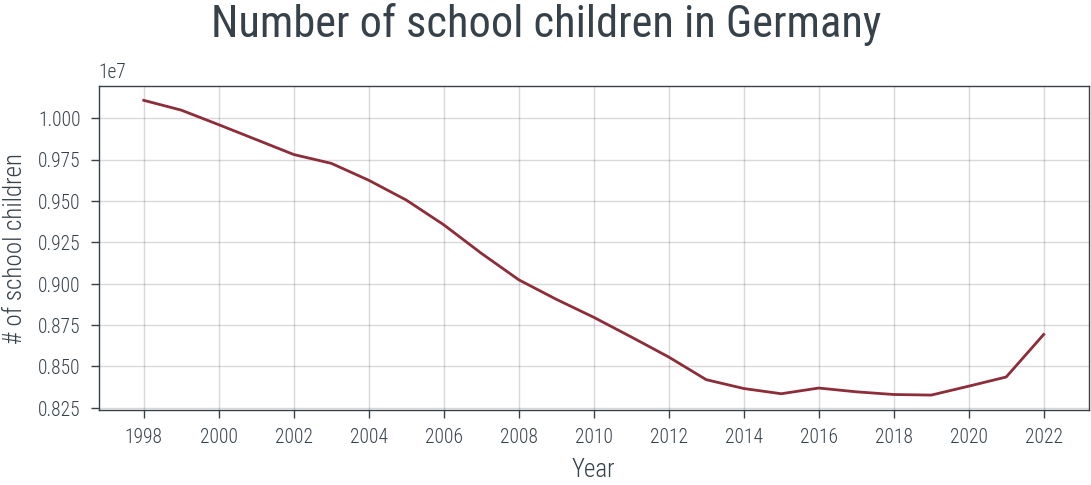

In [19]:
# Plot the data
fig, ax = plt.subplots(1, 1)


aggregated = data.groupby(["Year", "Gender", "Type"])[
    "Value"].sum().reset_index()
aggregated.rename(columns={0: "Value"}, inplace=True)

male = aggregated.loc[aggregated["Gender"] == "m"]
female = aggregated.loc[aggregated["Gender"] == "f"]
all = aggregated.loc[aggregated["Gender"] == "all"]

ax.plot(all[all["Type"] == "Pupils"]["Year"],
        all[all["Type"] == "Pupils"]["Value"])

ax.set_xlabel("Year")
ax.set_ylabel("# of school children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))
ax.grid()

# Other settings
fig.suptitle("Number of school children in Germany", fontsize=16)

plt.show()

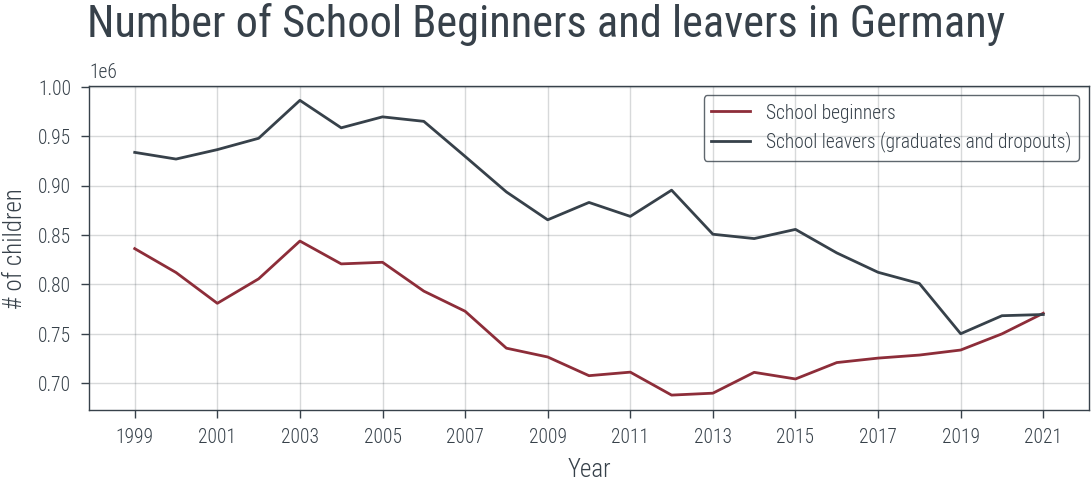

In [20]:
# Plot the data
fig, ax = plt.subplots(1, 1)


aggregated = data.groupby(["Year", "Gender", "Type"])[
    "Value"].sum().reset_index()
aggregated = aggregated[aggregated["Year"]
                        >= 1999].loc[aggregated["Year"] <= 2021]
aggregated.rename(columns={0: "Value"}, inplace=True)

male = aggregated.loc[aggregated["Gender"] == "m"]
female = aggregated.loc[aggregated["Gender"] == "f"]
all = aggregated.loc[aggregated["Gender"] == "all"]
ax.plot(all[all["Type"] == "School beginners"]["Year"],
        all[all["Type"] == "School beginners"]["Value"])
ax.plot(all[all["Type"] == "School leavers (graduates and dropouts)"]["Year"],
        all[all["Type"] == "School leavers (graduates and dropouts)"]["Value"])


ax.set_xlabel("Year")
ax.set_ylabel("# of children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))
ax.legend(["School beginners", "School leavers (graduates and dropouts)"])
ax.grid()

# Other settings
fig.suptitle("Number of School Beginners and leavers in Germany", fontsize=16)

plt.show()

## Plots per school type

see <https://www.datenportal.bmbf.de/portal/en/G287.html> for school type descriptions


In [21]:
data_school_type["School Type"].value_counts()

School Type
Pre-school classes                                  975
Integrated comprehensive schools                    975
Adult education colleges                            975
Evening grammar schools                             975
Evening intermediate schools                        975
Evening secondary general schools                   975
Special schools                                     975
Free Waldorf Schools                                975
Grammar schools (8 years of schooling)              975
School kindergartens                                975
Grammar schools (9 years of schooling)              975
Intermediate schools                                975
Schools with various courses of education           975
Secondary general schools                           975
Orientation stages independent of school type       975
Primary schools                                     975
Assignment to the type of school is not possible    975
Name: count, dtype: int64

In [22]:
data_school_type["Gender"].value_counts()

Gender
Male      5525
Female    5525
Total     5525
Name: count, dtype: int64

## Gymnasium G8/G9


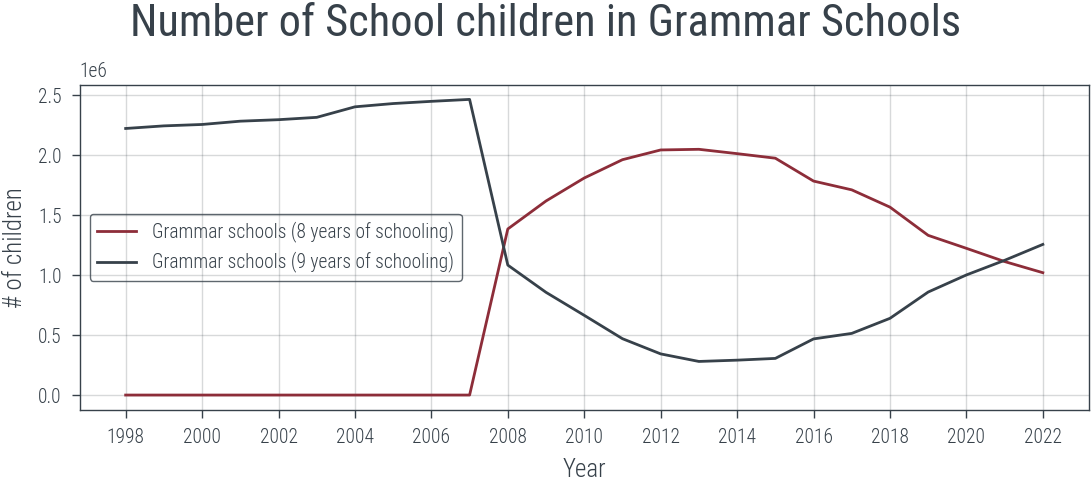

In [23]:
plot_data = pd.concat([
    data_school_type[data_school_type["School Type"]
                     == "Grammar schools (9 years of schooling)"],
    data_school_type[data_school_type["School Type"]
                     == "Grammar schools (8 years of schooling)"],
], ignore_index=True)
plot_data = plot_data.groupby(["School Type", "Gender", "Year"])[
    "Students"].sum().reset_index()
plot_data.rename(columns={0: "Students"}, inplace=True)

# Plot the data
fig, ax = plt.subplots(1, 1)

# Male, Female, Total
male = plot_data.loc[plot_data["Gender"] == "Male"]
female = plot_data.loc[plot_data["Gender"] == "Female"]
all = plot_data.loc[plot_data["Gender"] == "Total"]

# Plot
school_types = all["School Type"].unique()
for t in school_types:
    ax.plot(all[all["School Type"] == t]["Year"],
            all[all["School Type"] == t]["Students"])

ax.set_xlabel("Year")
ax.set_ylabel("# of children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))
ax.legend(school_types)
ax.grid()

# Other settings
fig.suptitle("Number of School children in Grammar Schools", fontsize=16)

plt.show()

## Certificate Type of graduates


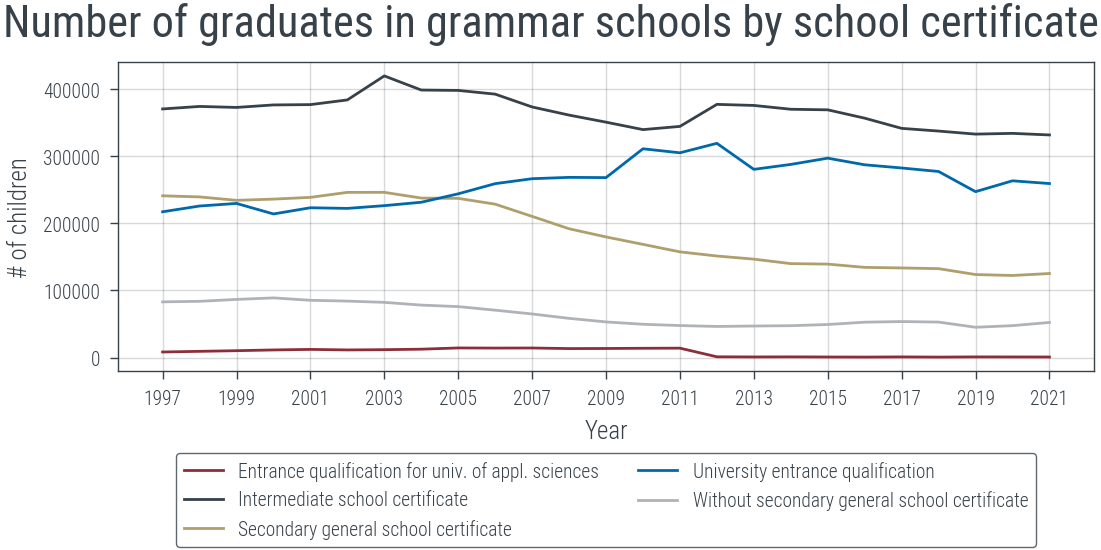

In [29]:
plot_data = graduates.copy()
plot_data = plot_data.groupby(["Certificate Type", "Gender", "Year"])[
    "Value"].sum().reset_index()
plot_data.rename(columns={0: "Value"}, inplace=True)

# Plot the data
fig, ax = plt.subplots(1, 1)

# Male, Female, Total
male = plot_data.loc[plot_data["Gender"] == "Male"]
female = plot_data.loc[plot_data["Gender"] == "Female"]
all = plot_data.loc[plot_data["Gender"] == "Total"]

# Plot
cert_types = all[all["Certificate Type"] !=
                 "Total"]["Certificate Type"].unique()
for t in cert_types:
    ax.plot(all[all["Certificate Type"] == t]["Year"],
            all[all["Certificate Type"] == t]["Value"])

ax.set_xlabel("Year")
ax.set_ylabel("# of children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))
ax.legend(cert_types, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.6))
ax.grid()

# Other settings
fig.suptitle(
    "Number of graduates in grammar schools by school certificate", fontsize=16)

plt.show()